In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
data = pd.read_csv('/content/data_evaluacion.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       48842 non-null  int64 
 1   1       48842 non-null  object
 2   2       48842 non-null  int64 
 3   3       48842 non-null  object
 4   4       48842 non-null  int64 
 5   5       48842 non-null  object
 6   6       48842 non-null  object
 7   7       48842 non-null  object
 8   8       48842 non-null  object
 9   9       48842 non-null  object
 10  10      48842 non-null  int64 
 11  11      48842 non-null  int64 
 12  12      48842 non-null  int64 
 13  13      48842 non-null  object
 14  14      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Agregamos la fila de encabezado
header = [
    'edad', 'clase_de_trabajo', 'fnlwgt', 'educación', 'num_educativo',
    'estado_civil', 'ocupación', 'relación', 'raza', 'género',
    'ganancia_de_capital', 'pérdida_de_capital', 'horas_por_semana',
    'país_nativo', 'ingresos'
]
df_header = pd.DataFrame([header])
data.columns = header
data.head()

,edad,clase_de_trabajo,fnlwgt,educación,num_educativo,estado_civil,ocupación,relación,raza,género,ganancia_de_capital,pérdida_de_capital,horas_por_semana,país_nativo,ingresos
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Verificar si hay datos nulos
print(data.isnull().sum())

edad                   0
clase_de_trabajo       0
fnlwgt                 0
educación              0
num_educativo          0
estado_civil           0
ocupación              0
relación               0
raza                   0
género                 0
ganancia_de_capital    0
pérdida_de_capital     0
horas_por_semana       0
país_nativo            0
ingresos               0
dtype: int64


In [ ]:
## Selección de caracteristicas
X = data.drop("ingresos", axis=1)
y = data['ingresos']

In [ ]:
# Separar variables categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns


In [ ]:
# Escalar las variables numéricas
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Codificar las variables categóricas (One-Hot Encoding)
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8506500153546934

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.90      7414
        >50K       0.74      0.58      0.65      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769


Confusion Matrix:
 [[6933  481]
 [ 978 1377]]


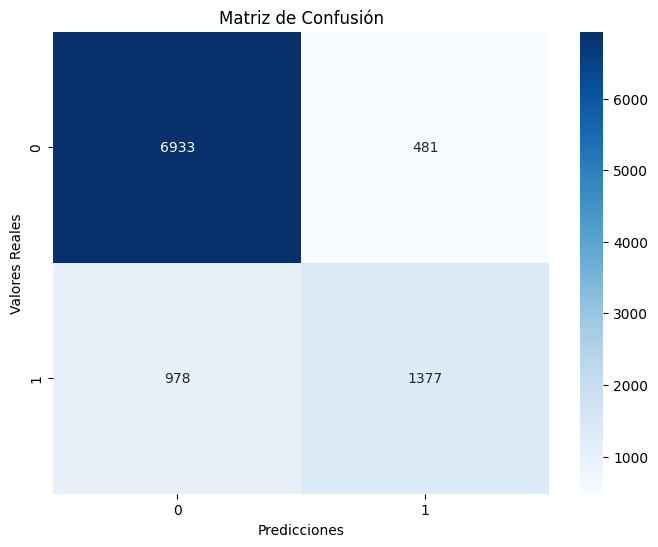

In [ ]:
# Gráfico de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

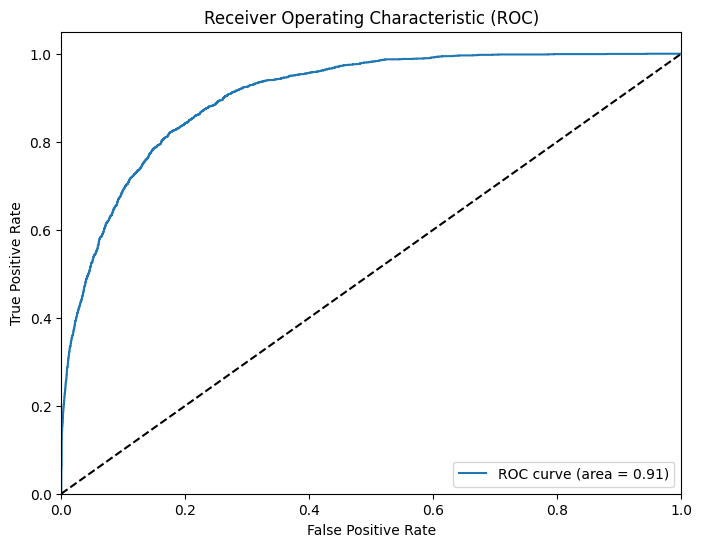

In [ ]:
# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
# Convert string labels to numeric labels (assuming '>50K' is the positive class)
y_test_numeric = (y_test == '>50K').astype(int)
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)
roc_auc = roc_auc_score(y_test_numeric, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()